# Finance Data 
When financial crisis in 2007

Dataset from yahoo finance

In [1]:
import fix_yahoo_finance as yf
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/opt/anaconda3/lib/python3.11/site-packages/fix_yahoo_finance/__init__.py:0: DeprecationWarning: 

*** `fix_yahoo_finance` was renamed to `yfinance`. ***
Please install and use `yfinance` directly using `pip install yfinance -U`

More information: https://github.com/ranaroussi/yfinance



In [2]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

df = yf.download(tickers, start, end)

# df = df.swaplevel(axis = 1)

df.columns.names = ['Stock Info','Bank Ticker']
df.index = [date.strftime('%Y-%m-%d') for date in df.index]
df.index.name = 'Date'

df.head()

[*********************100%***********************]  6 of 6 completed


Stock Info   Adj Close                                               \
Bank Ticker        BAC           C         GS        JPM         MS   
Date                                                                  
2006-01-03   31.544907  326.256775  96.240044  24.366919  32.405113   
2006-01-04   31.209885  320.233368  94.910759  24.226282  32.427341   
2006-01-05   31.250101  321.821930  94.873421  24.299662  32.516258   
2006-01-06   31.203194  321.821930  96.217674  24.470873  32.549603   
2006-01-09   31.223284  320.299469  97.375191  24.868315  32.894135   

Stock Info                  Close                                     ...  \
Bank Ticker        WFC        BAC           C          GS        JPM  ...   
Date                                                                  ...   
2006-01-03   18.979553  47.080002  492.899994  128.869995  40.189999  ...   
2006-01-04   18.759409  46.580002  483.799988  127.089996  39.619999  ...   
2006-01-05   18.738594  46.639999  486.200012  127.040001  39.740002  ...   
2006-01-06   18.848654  46.570000  486.200012  128.839996  40.020000  ...   
2006-01-09   18.845680  46.599998  483.899994  130.389999  40.669998  ...   

Stock Info         Open                                     Volume           \
Bank Ticker          GS        JPM         MS        WFC       BAC        C   
Date                                                                          
2006-01-03   126.699997  39.830002  57.169998  31.600000  16296700  1537600   
2006-01-04   127.349998  39.779999  58.700001  31.799999  17757900  1870960   
2006-01-05   126.000000  39.610001  58.549999  31.500000  14970700  1143160   
2006-01-06   127.290001  39.919998  58.770000  31.580000  12599800  1370210   
2006-01-09   128.500000  39.880001  58.630001  31.674999  15619400  1680740   

Stock Info                                         
Bank Ticker       GS       JPM       MS       WFC  
Date                                               
2006-01-03   6188700  12838600  5377000  11016400  
2006-01-04   4861600  13491500  7977800  10870000  
2006-01-05   3717400   8109400  5778000  10158000  
2006-01-06   4319600   7966900  6889800   8403800  
2006-01-09   4723500  16575200  4144500   5619600  

[5 rows x 36 columns]

#### max "Close price"

In [3]:
df.xs(key='Close', axis = 1,level = 'Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

#### rate of return

In [4]:
returns = pd.DataFrame()

In [5]:
returns = df.xs(key='Close', axis = 1,level = 'Stock Info').pct_change()
returns = returns.set_axis([tick+' return' for tick in returns.columns], axis = 1)
returns.head()

,BAC return,C return,GS return,JPM return,MS return,WFC return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


#### relative

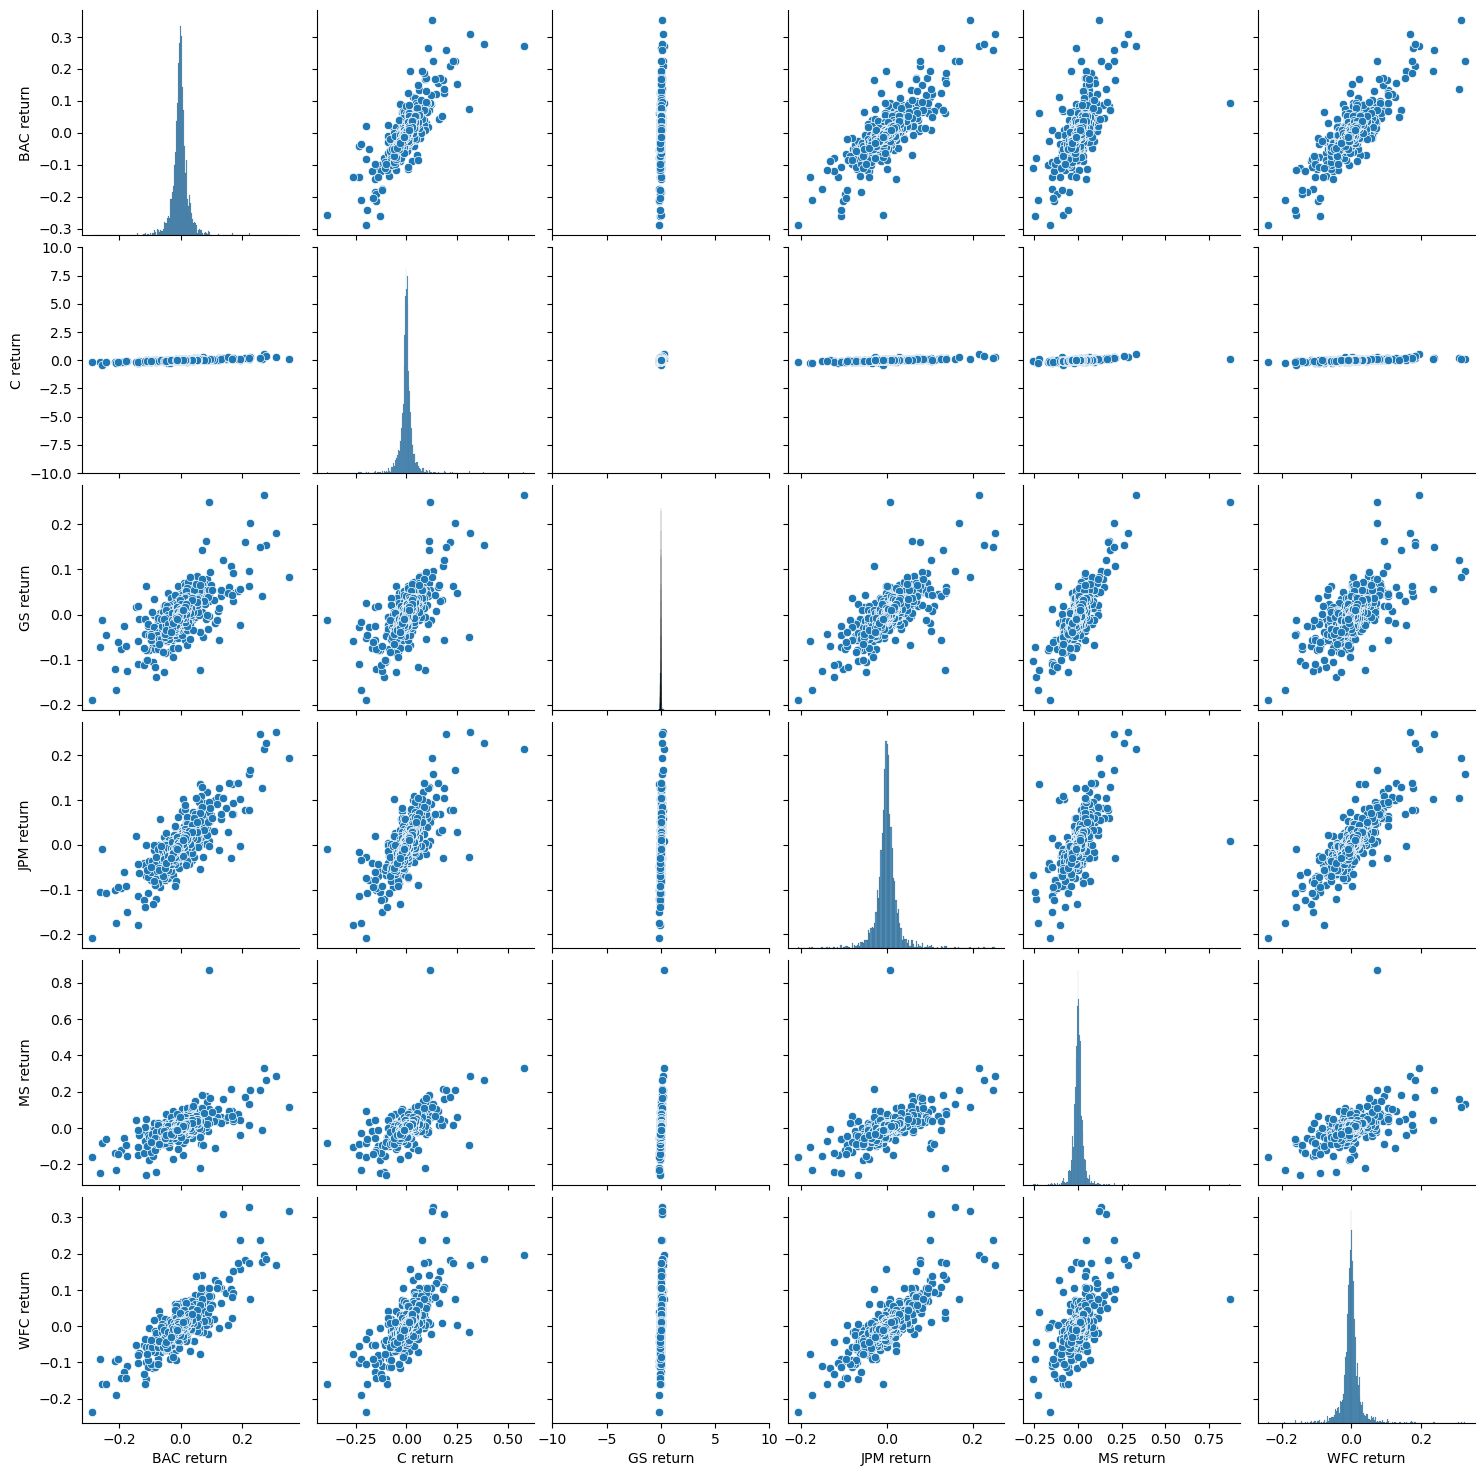

In [6]:
g = sns.pairplot(returns[1:])
g.axes[0, 2].set_xlim(-10, 10)
g.axes[1, 2].set_ylim(-10, 10)
plt.show()

In [7]:
# 新總統上任及信貸危機金融風暴
returns.idxmin()

BAC return    2009-01-20
C return      2009-02-27
GS return     2009-01-20
JPM return    2009-01-20
MS return     2008-10-09
WFC return    2009-01-20
dtype: object

In [8]:
# 貨幣政策 短期貸款政策及股票分割
returns.idxmax()

BAC return    2009-04-09
C return      2008-11-24
GS return     2008-11-24
JPM return    2009-01-21
MS return     2008-10-13
WFC return    2008-07-16
dtype: object

In [9]:
# 風險最高銀行為花旗
returns.std()

BAC return    0.036647
C return      0.038672
GS return     0.025390
JPM return    0.027667
MS return     0.037819
WFC return    0.030238
dtype: float64

In [10]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC return    0.016163
C return      0.015289
GS return     0.014046
JPM return    0.014017
MS return     0.016249
WFC return    0.012591
dtype: float64

#### MS 2015 count

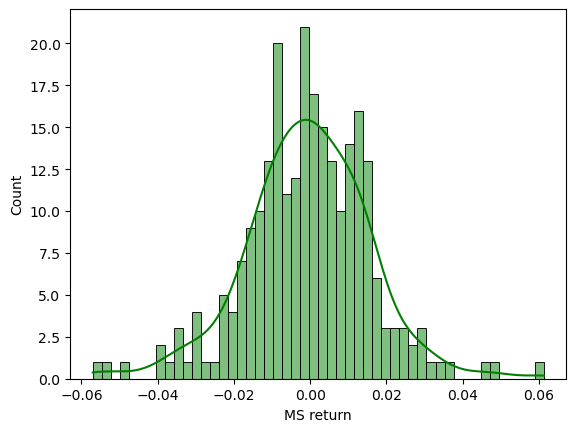

In [11]:
r_2015 = returns.loc['2015-01-01':'2016-01-01']

sns.histplot(x = 'MS return', data = r_2015, 
            kde = True, color = 'green', 
            bins = 50)
plt.show()

#### CitiGroup 2008 count

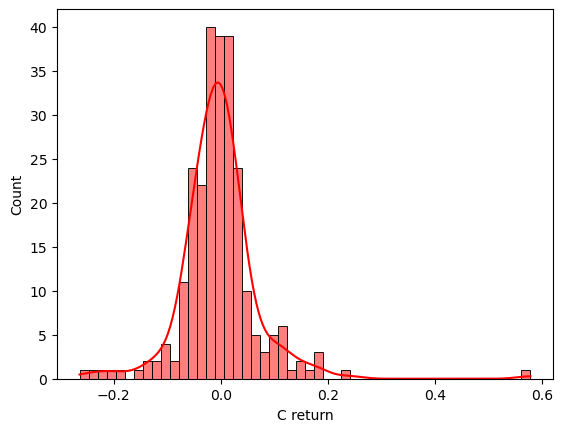

In [12]:
r_2008 = returns.loc['2008-01-01':'2009-01-01']

sns.histplot(x = 'C return', data = r_2008, 
            kde = True, color = 'red', 
            bins = 50)

plt.show()

In [13]:
sns.set_style('whitegrid')
import plotly
import cufflinks as cf
cf.go_offline()

####  Close price / per bank in time

In [14]:
df.xs('Close', axis = 1, level = 'Stock Info').iplot()
plt.show()

#### rolling 30 d v.s. BAC Close price

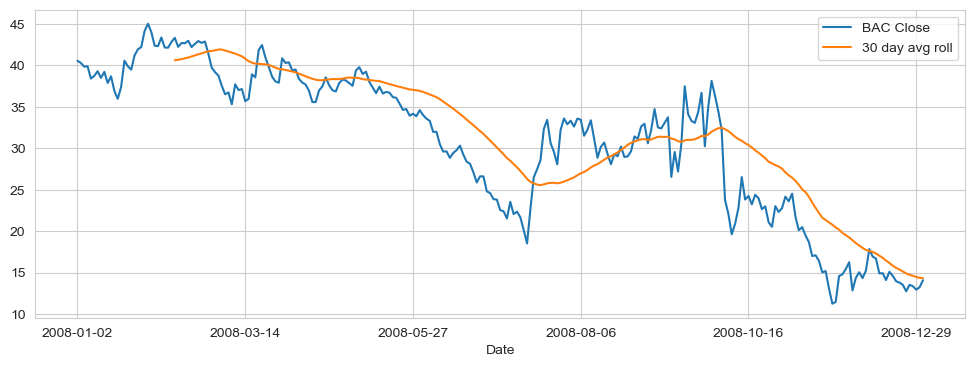

In [15]:
plt.figure(figsize=(12, 4))
df['Close', 'BAC'].loc['2008-01-01':'2009-01-01'].plot(label = 'BAC Close')
df['Close', 'BAC'].loc['2008-01-01':'2009-01-01'].rolling(window = 30)\
    .mean().plot(label = '30 day avg roll')
plt.legend()
plt.show()

#### close price corr

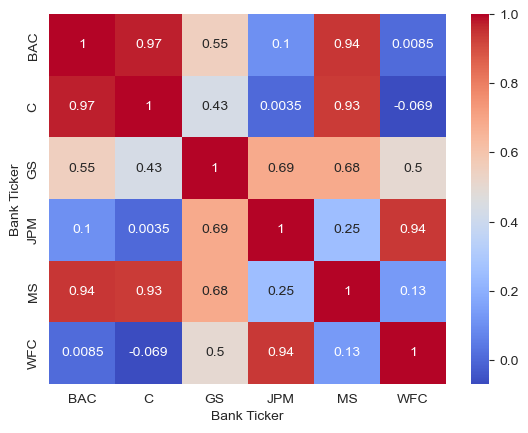

In [16]:
dfClose = df.xs(key = 'Close', axis = 1, level = 'Stock Info')
sns.heatmap(dfClose.corr(), annot = True, 
           cmap = 'coolwarm')
plt.show()

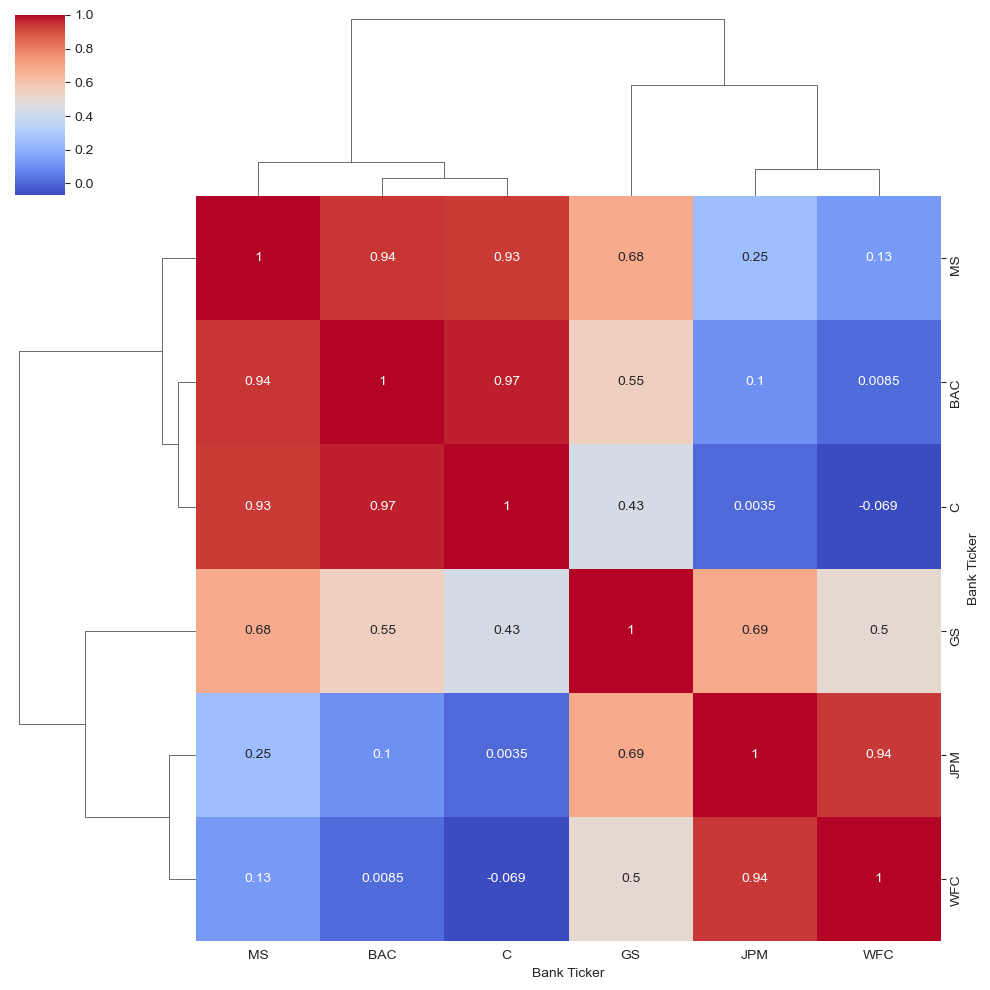

In [17]:
sns.clustermap(dfClose.corr(), annot = True, 
           cmap = 'coolwarm')
plt.show()

#### BAC 2015 candle

In [18]:
df.xs('BAC', axis = 1, level = 'Bank Ticker')\
    .loc['2015-01-01':'2016-01-01']\
    .iplot(kind = 'candle')

#### MS 2015 sma

In [19]:
df.xs('MS', axis = 1, level = 'Bank Ticker').drop(['Volume', 'Adj Close'], axis = 1)\
    .loc['2015-01-01':'2016-01-01']\
    .ta_plot(study='sma')

#### BAC 2015 Bollinger Band

In [20]:
df['Close']['BAC']\
    .loc['2015-01-01':'2016-01-01']\
    .ta_plot(study='boll')